# Exercise 2: Analyzing vegetation indices

## 1. Install dependencies if needed

Run the commands below to install the dependencies

In [1]:
!pip install -q pillow==10.0.1 matplotlib==3.8.0 scikit-image==0.21.0 scikit-learn==1.3.1

## 2. Compute the Normalized Difference Vegetation Index (NDVI) of sentinel images
- Download the Sentinel-2 images from [here](https://drive.google.com/file/d/1NGfrldM4r7uC04nRgevD4DUH48Bnm72Y/view?usp=sharing).
- Place the downloaded .zip file to the same folder as this notebook


In [2]:
import zipfile
import os

with zipfile.ZipFile("images_week2.zip", 'r') as zip_ref:
    zip_ref.extractall()
    
print(os.listdir("images_week2"))

['image_2021_08', 'image_2021_06', 'image_2021_02', 'image_2021_04', 'image_2020_10']


- Alternatively, download the Sentinel-2 images from [here](https://drive.google.com/file/d/1NGfrldM4r7uC04nRgevD4DUH48Bnm72Y/view?usp=sharing). 

- The zip file has 5 folders that contain files of 5 different sentinel images acquired in different timestamps. The folder names have the following structure: ***image_year_month***. Read the images using the function ***imread*** of the ***skimage*** library
- Compute NDVI of each image and save it on disk
- Visualize the NDVI image of the sentinel image taken on Aug 2021

In [3]:
import os
# TODO: Fill the directory path where the images were uncompressed
images_path = "images_week2/"
sub_directories = ["image_2020_10", "image_2021_02", "image_2021_04", "image_2021_06", "image_2021_08"]
directories = [os.path.join(images_path, subdir) for subdir in sub_directories]

In [4]:
import numpy as np
from skimage.io import imsave, imread

# Compute NDVI of several sentinel images
for directory in directories:
    # Define the full image paths to read the Red and NIR band of each sentinel image
    band4_path = directory + "/band4.jp2" # Red
    band8_path = directory + "/band8.jp2" # Near-infrared (NIR)
    
    # Read images
    band4_array = imread(band4_path).astype(np.float32)
    band8_array = imread(band8_path).astype(np.float32)
    
    # TODO: compute NDVI indexes
    ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
    
    # Save NDVI image
    ndvi_path = directory + "/ndvi.tif".format(directory)
    imsave(ndvi_path, ndvi_array)
    print("Image saved in: " + ndvi_path)

/Users/john.vargas/opt/anaconda3/envs/test_ipeo_2022/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Image saved in: images_week2/image_2020_10/ndvi.tif
Image saved in: images_week2/image_2021_02/ndvi.tif
Image saved in: images_week2/image_2021_04/ndvi.tif
Image saved in: images_week2/image_2021_06/ndvi.tif
Image saved in: images_week2/image_2021_08/ndvi.tif


Now, let's visualize the NDVI images

In [5]:
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

def plot_vegetation_index(image_arr):
    # Remove outliers
    p_min, p_max = np.percentile(image_arr[~np.isnan(image_arr)], (2, 98))
    image_arr_clipped = image_arr.clip(p_min, p_max)
    # Create a color map
    cmap_rg=LinearSegmentedColormap.from_list('rg',
                        ["red", "yellow", "green", "darkgreen"], N=256) 
    # Show image
    plt.imshow(image_arr_clipped, cmap=cmap_rg)
    plt.colorbar()

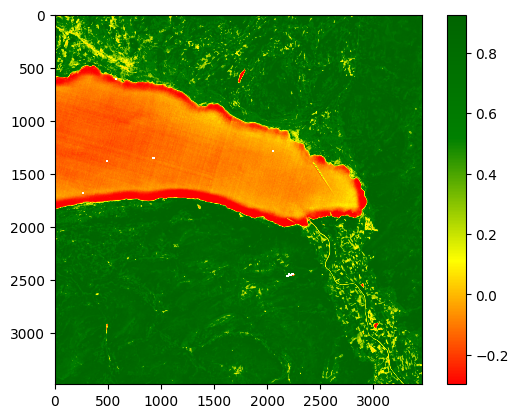

In [6]:
# TODO: Visualize the NDVI image (that you saved on disk in previous code blocks) 
#       of the sentinel image taken on Aug 2021,
#       using the function plot_vegetation_index (defined above)
ndvi_path = images_path + "image_2021_08/ndvi.tif".format(images_path)
ndvi = imread(ndvi_path)
plot_vegetation_index(ndvi)

## 3. Compute and visualize the average NDVI values of 4 regions in the 5 images provided

- Compute the average NDVI of 4 regions (defined by the bounding boxes) in the 5 images provided.
- The sentinel images were taken on Oct 2020, Feb 2021,  Apr 2021, Jun 2021, and Aug 2021.
- The bounding boxes are defined in the pixel coordinate system
- Use the function ***crop_image*** defined below to crop the regions
- Visualize the average NDVI values of the 4 regions as temporal series, using matplotlib. It can help to see the code example presented in slide 4 of the exercise 2 (available on moodle)

In [7]:
def crop_image_array(image_array, y_min, x_min, y_max, x_max):
    """
    Crop image array, delimited by a bounding box
    
    Parameters
    ==================
    
    y_min: int
        Minimum vertical coordinate of the bounding box
    x_min: int
        Minimum horizontal coordinate of the bounding box
    y_max: int
        Maximum vertical coordinate of the bounding box
    x_max: int
        Maximum horizontal coordinate of the bounding box
    
    """
    return image_array[y_min:y_max+1, x_min:x_max+1]

In [8]:
# Bounding boxes of the regions to be analyzed
bounding_boxes = {'vineyard':    {'y_min': 814, 'x_min': 1509, 'y_max': 818, 'x_max': 1513}, 
                  'trees':       {'y_min': 3173, 'x_min': 3239, 'y_max': 3177, 'x_max': 3243}, 
                  'sport_field': {'y_min': 1278, 'x_min': 2628, 'y_max': 1282, 'x_max': 2632}, 
                  'buildings':   {'y_min': 1511, 'x_min': 2794, 'y_max': 1515, 'x_max': 2798}
                 }

In [9]:
# TODO: Compute the average NDVI values 
#       of the 4 regions in the 5 images (sorted in chronological order),
#       and stored it in a dictionary with the following structure. 
#
# ndvi_values = {
#   "vineyard" : [avg_ndvi_of_region_vineyard_in_image1, 
#                 avg_ndvi_of_region_vineyard_in_image2, 
#                ..., 
#                avg_ndvi_of_region_vineyard_in_image5]
#
#   "trees" :    [avg_ndvi_of_region_trees_in_image1, 
#                 avg_ndvi_of_region_trees_in_image2, 
#                ..., 
#                avg_ndvi_of_region_trees_in_image5]
#
#   "buildings" : [avg_ndvi_on_region_buildings_in_image1, 
#                 avg_ndvi_on_region_buildings_in_image2, 
#                ..., 
#                avg_ndvi_on_region_buildings_in_image5]
#
#   "sport_field" : [avg_ndvi_on_region_sport_field_in_image1, 
#                 avg_ndvi_on_region_sport_field_in_image2, 
#                ..., 
#                avg_ndvi_on_region_sport_field_in_image5]
# }

# Create an empty dictionary
ndvi_values = {}
# Iterate over all the regions. 
# The function ".keys()" retrieves the keys of a dictionary
# In the code below bounding_boxes.keys() = ["vineyard", "trees", "buildings", "sport_field"]
for region in bounding_boxes.keys():
    ndvi_values[region] = []
    for directory in directories:
        # TODO: Read the NDVI images you saved
        input_ndvi_path = directory + "/ndvi.tif"
        ndvi_array = imread(input_ndvi_path)
        
        # TODO: Crop image using the bounding box of each "region" 
        #       Use the function "crop_image_array" defined above
        y_min = bounding_boxes[region]["y_min"]
        y_max = bounding_boxes[region]["y_max"] 
        x_min = bounding_boxes[region]["x_min"]
        x_max = bounding_boxes[region]["x_max"] 
        crop_ndvi_array = crop_image_array(ndvi_array, y_min, x_min, y_max, x_max)
        
        # TODO: Compute average NDVI value for the cropped region (using np.mean)
        avg_ndvi = np.mean(crop_ndvi_array)
        
        # TODO: Add the computed average NDVI value to the list ndvi_values[region]
        ndvi_values[region].append(avg_ndvi)

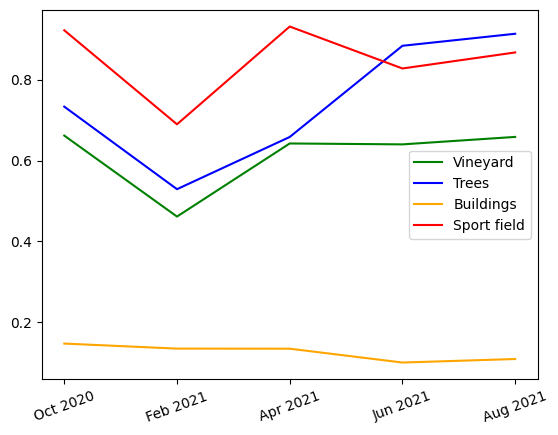

In [10]:
# TODO: Plot the computed average NDVI values of the 4 regions in the 5 images
#       follow the example of the slides of the exercise 2 (available on moodle)
x = np.arange(5)
plt.plot(x, ndvi_values["vineyard"], label='Vineyard', color='green')
plt.plot(x, ndvi_values["trees"], label='Trees', color='blue')
plt.plot(x, ndvi_values["buildings"], label='Buildings', color='orange')
plt.plot(x, ndvi_values["sport_field"], label='Sport field', color='red')
plt.xticks(x, ['Oct 2020', 'Feb 2021', 'Apr 2021', 'Jun 2021', 'Aug 2021'], rotation=20)
plt.legend()

## 4. Answer the remaining questions of the PDF instructions file

#### Q1. In general, which months have the lowest and highest NDVI values?

As expected in winter the NDVI values are very low, and in general the highest values are attained during the spring and summer.

#### Q2. Which regions have overall the lowest and highest values of NDVI? and why do you think that happen? 

The green areas have the highest values of NDVI (sport fields, trees, and vineyards) while Buildings has the lowest NDVI in all months.

#### Q3. What can you observe when comparing NDVI values of vineyards and trees over time? Why do you think the temporal series of those regions are more different in certain months than others?

The time series of vineyards and trees are similar from October to April. However, after April branches are pruned in the vineyards of the example.